For Train :
MAE: 1.41
MSE: 6.63
RMSE: 2.58
R-squared: 0.5689

For test:
MAE: 1.33
MSE: 5.19
RMSE: 2.28
R-squared: 0.6327


For Train :
MAE: 1.41
MSE: 6.63
RMSE: 2.58
R-squared: 0.5689

For test:
MAE: 1.33
MSE: 5.19
RMSE: 2.28
R-squared: 0.6327


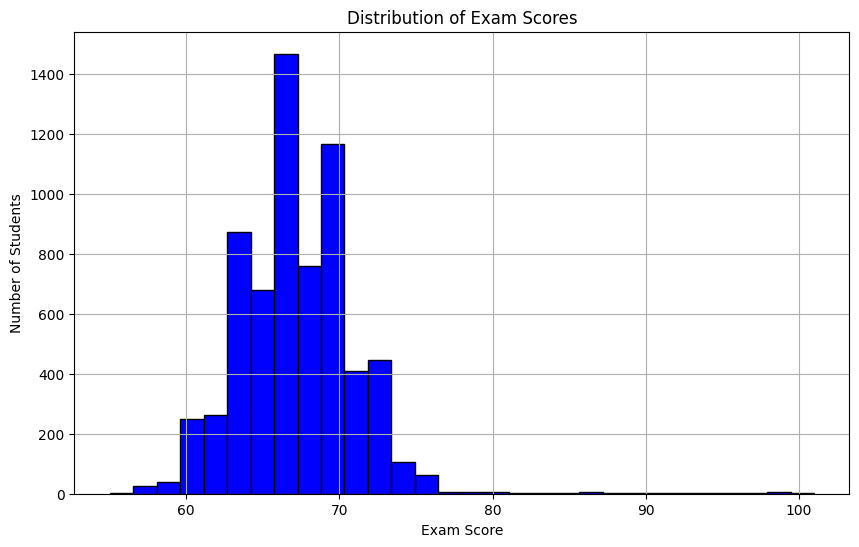

For Train :
MAE: 1.41
MSE: 6.63
RMSE: 2.58
R-squared: 0.5689

For test:
MAE: 1.33
MSE: 5.19
RMSE: 2.28
R-squared: 0.6327


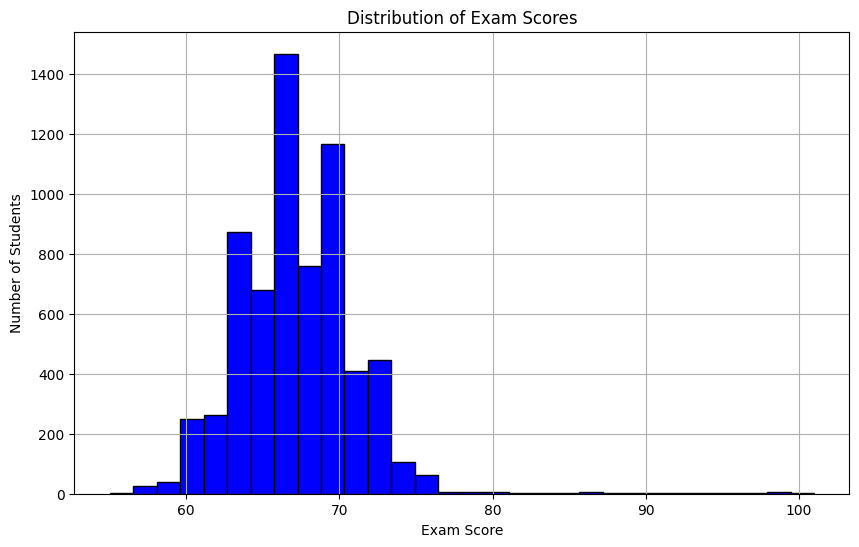

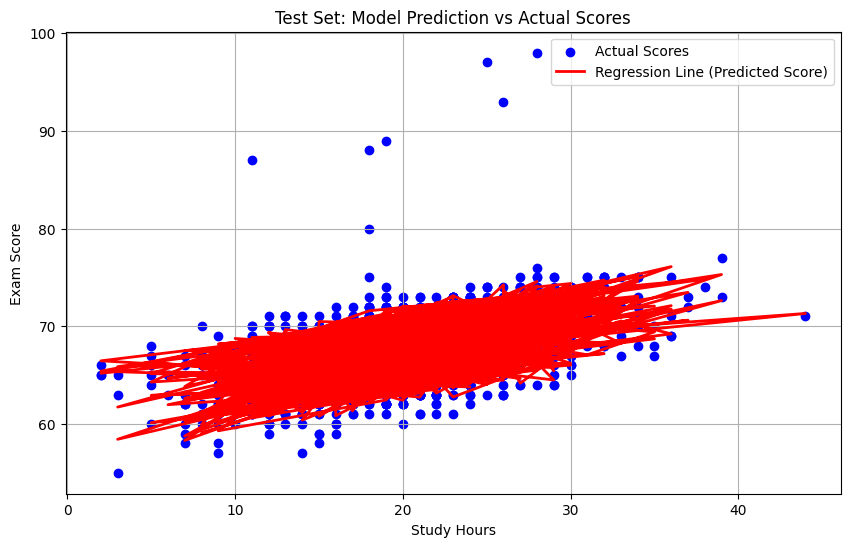

Predicted Exam Score for the given data: [66.3510016] 


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('StudentPerformanceFactors.csv')

# Select features for prediction
features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Motivation_Level']
# Encode Motivation_Level (categorical) to numeric
data['Motivation_Level'] = data['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

X = data[features]
Y = data['Exam_Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on train and test sets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Evaluate performance
print("For Train :")
print("MAE:", round(mean_absolute_error(Y_train, train_pred), 2))
print("MSE:", round(mean_squared_error(Y_train, train_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(Y_train, train_pred)), 2))
print("R-squared:", round(r2_score(Y_train, train_pred), 4))

print("\nFor test:")
print("MAE:", round(mean_absolute_error(Y_test, test_pred), 2))
print("MSE:", round(mean_squared_error(Y_test, test_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(Y_test, test_pred)), 2))
print("R-squared:", round(r2_score(Y_test, test_pred), 4))

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Exam_Score'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

# Scatter plot and regression line (using test set)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Hours_Studied'], Y_test, color='blue', label='Actual Scores')
plt.plot(X_test['Hours_Studied'], test_pred, color='red', linewidth=2, label='Regression Line (Predicted Score)')
plt.title('Test Set: Model Prediction vs Actual Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.legend()
plt.show()

new_data = pd.DataFrame({
    'Hours_Studied': [8],
    'Attendance': [90],
    'Previous_Scores': [75],
    'Motivation_Level': [2]  # Assuming 'High' motivation
})

new_score = model.predict(new_data)
print(f"Predicted Exam Score for the given data: {new_score} ")